In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [124]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as pxc
from ipywidgets import interact


In [125]:
import pandas as pd

# Laden der Datei in ein Pandas DataFrame
datei_path = r"C:\Users\Kunde\Desktop\BNT_Technikerschule\Dr. Movsessian\Projekt Windkraftanlage\Features_for_SHAP32rpm_repaierd.txt"
df = pd.read_csv(datei_path)

# Anzeigen der ersten Zeilen des DataFrames
df.tail()


# ...

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
2922,1926.096405,22.077982,175.857296,-45.826991,50.419635,-196.514162,-19.894280,17.230319,106.262023,73.319511,...,32.025182,225.3840,2.175221,0.005802,1.0,-0.203927,-0.204647,10.02373,-35.567223,19.300004
2923,1968.053957,1.849336,237.957362,-40.600944,37.026843,-172.434916,-17.566236,12.396130,92.356970,53.739386,...,32.024936,225.4025,2.175308,0.005802,1.0,-0.203776,-0.166080,10.02100,-35.075370,18.866672
2924,1878.377866,17.217453,313.894413,-33.844109,56.978583,-157.683324,-14.607295,7.955903,96.110466,57.960094,...,32.025416,224.6777,2.154097,0.005802,1.0,-0.202933,-0.446031,10.02232,-27.235961,19.676828
2925,1883.592661,56.197118,452.159911,-29.978124,108.109518,-139.086048,6.094632,11.027323,106.358605,72.326554,...,32.026613,220.8360,2.157872,0.005802,1.0,-0.202147,-0.475663,10.02020,6.454405,19.960807
2926,1888.385538,48.195217,431.133481,-29.426011,87.764201,-129.770940,21.244808,12.426216,108.380538,70.841707,...,32.031763,213.0807,2.180657,0.005802,1.0,-0.202552,-0.527526,10.03005,104.349985,22.522516


# Anzeige in Tabs (Jupyter Widgets)
## Mit Jupyter Widgets können Sie die Spalten in Tabs aufteilen, um die Anzeige zu erleichter

In [126]:
def display_df_in_tabs(df, chunk_size=10):
    num_chunks = (len(df.columns) + chunk_size - 1) // chunk_size
    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, len(df.columns))
        chunk = df.iloc[:, start:end]
        tab = widgets.Tab(children=[widgets.Output(layout=widgets.Layout(width='auto')) for _ in range(len(chunk.columns))],
                          titles=list(chunk.columns))
        for j, col in enumerate(chunk.columns):
            with tab.children[j]:
                display(chunk[col])
        display(tab)

display_df_in_tabs(df)



In [127]:
df_2=df
print(df_2["Generator_on_off"].value_counts())


Generator_on_off
1.000000    2127
0.000000      31
0.888542       1
0.807813       1
0.701042       1
0.854167       1
0.658333       1
0.752083       1
0.475521       1
0.744271       1
0.857812       1
0.846354       1
Name: count, dtype: int64


In [128]:
df.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'novelty_index'],
      dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cov1_1            2927 non-null   float64
 1   Cov1_2            2927 non-null   float64
 2   Cov1_4            2927 non-null   float64
 3   Cov1_5            2927 non-null   float64
 4   Cov1_7            2927 non-null   float64
 5   Cov1_8            2927 non-null   float64
 6   Cov1_10           2927 non-null   float64
 7   Cov1_11           2927 non-null   float64
 8   Cov2_2            2927 non-null   float64
 9   Cov2_4            2927 non-null   float64
 10  Cov2_5            2927 non-null   float64
 11  Cov2_7            2927 non-null   float64
 12  Cov2_8            2927 non-null   float64
 13  Cov2_10           2927 non-null   float64
 14  Cov2_11           2927 non-null   float64
 15  Cov4_4            2927 non-null   float64
 16  Cov4_5            2927 non-null   float64


In [130]:

df.describe()

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2168.000000,2168.000000,2927.000000,2168.000000,2927.000000,2927.000000
mean,1747.931863,-2.260068,317.196271,-28.444858,46.515793,-159.859453,10.256604,18.023993,95.290987,65.304500,...,31.982444,219.890276,2.618653,0.009267,0.984588,-0.146232,-0.365317,9.947981,10.156601,6.983072
std,199.708307,39.504559,151.510188,19.806876,69.737599,27.411937,20.140408,9.595882,12.554723,30.339935,...,0.251218,80.914737,2.770315,0.071789,0.120005,0.431149,0.340793,0.661750,102.590188,3.508187
min,989.239237,-145.223071,-78.720347,-96.682045,-140.913708,-304.416136,-65.375506,-14.446204,65.348420,7.278890,...,30.000287,0.131618,-3.371019,-0.000454,0.000000,-0.880806,-1.426433,4.000000,-179.463434,2.764926
25%,1624.058779,-32.330924,189.466139,-41.199322,-10.279779,-177.269372,-5.901096,12.420366,85.870861,42.781594,...,32.009364,191.184350,0.959786,0.000000,1.000000,-0.214719,-0.484065,10.007517,-74.649448,4.726142
50%,1750.020173,-5.972418,321.332371,-28.991283,49.155240,-161.358001,10.987156,18.572368,94.012226,59.270103,...,32.025193,229.806000,2.269189,0.005649,1.000000,-0.197195,-0.263347,10.017120,13.881518,6.049983
75%,1876.425325,29.254731,442.783770,-16.136016,108.141518,-143.200508,25.728132,24.983788,103.875741,82.512411,...,32.030999,278.209200,4.478815,0.005802,1.000000,-0.175742,-0.124634,10.041622,100.276608,7.826569
max,2924.941275,106.863926,733.283649,51.777710,189.242296,-54.493735,73.917371,41.616833,145.757134,183.928483,...,32.102752,359.859600,11.945510,1.000000,1.000000,7.898488,-0.000035,10.136890,179.890022,31.580461


In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dummy-Daten erstellen (falls nötig)
# df = pd.read_csv('dein_windkraftdaten.csv')

# Output-Widget erstellen
output = widgets.Output()

def erstelle_pairplot(szenario):
    with output:  # Nutzt das Output-Widget, um doppelte Ausgaben zu verhindern
        clear_output(wait=True)  # Vorherige Plots entfernen
        
        if szenario == 'Wind- und Leistungsdaten':
            spalten = ['WindSpeed', 'Power_kW', 'DC1_RPM', 'DC2_RPM']
            titel = 'Pairplot: Wind- und Leistungsdaten'
        elif szenario == 'Umweltbedingungen und Leistung':
            spalten = ['Temperature', 'Preciptation', 'Power_kW']
            titel = 'Pairplot: Umweltbedingungen und Leistung'
        elif szenario == 'Ausrichtung und Leistung':
            spalten = ['Pitch_deg', 'Yaw', 'Azimuth', 'Power_kW']
            titel = 'Pairplot: Ausrichtung und Leistung'

        else:
            print("Ungültiges Szenario")
            return

        try:
            plot = sns.pairplot(df[spalten])  # Pairplot erstellen
            plot.fig.suptitle(titel, y=1.02)  # Titel setzen
            plt.show()
        except Exception as e:
            print(f"Fehler: {e}")

# Dropdown für die Szenario-Auswahl
dropdown = widgets.Dropdown(options=['Wind- und Leistungsdaten', 'Umweltbedingungen und Leistung', 'Ausrichtung und Leistung'], description='Szenario:')

# Verknüpfe Dropdown mit der Funktion
dropdown.observe(lambda change: erstelle_pairplot(change['new']), names='value')

# Anzeige
display(dropdown, output)

# Initiale Anzeige
erstelle_pairplot(dropdown.value)


Dropdown(description='Szenario:', options=('Wind- und Leistungsdaten', 'Umweltbedingungen und Leistung', 'Ausr…

Output()

In [132]:
df[['WindSpeed', 'Power_kW', 'DC1_RPM', 'DC2_RPM']].corr()

,WindSpeed,Power_kW,DC1_RPM,DC2_RPM
WindSpeed,1.000000,-0.052118,0.229977,0.224250
Power_kW,-0.052118,1.000000,-0.012835,-0.015668
DC1_RPM,0.229977,-0.012835,1.000000,0.970119
DC2_RPM,0.224250,-0.015668,0.970119,1.000000


# Schwellenwerte defenieren


In [133]:
import pandas as pd

df["label"] = 0  # Alle auf 0 setzen (gesund)
df.loc[1000:, "label"] = 1  # Ab dem 1001. Datensatz auf 1 setzen


In [134]:
df.head()

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index,label
0,1604.693964,15.539143,234.360731,-29.198898,-29.696108,-174.435498,5.294636,13.208515,103.044169,76.550332,...,301.6180,1.058571,0.005802,1.0,-0.187492,-0.810439,10.016490,79.443319,6.079959,0
1,1861.784662,10.646878,287.175683,-1.101319,-8.384048,-143.507229,17.342184,5.472433,95.421077,72.434463,...,310.6925,1.005459,0.005802,1.0,-0.186697,-0.728026,9.987154,169.102944,6.131423,0
2,1805.136838,3.942351,443.755406,-34.091535,137.278927,-165.150455,33.648916,32.939838,107.493644,62.109914,...,306.4801,0.993840,0.005802,1.0,-0.186570,-1.251558,9.990298,18.880804,6.508935,0
3,1687.309584,-41.761691,500.063708,-33.667017,83.605024,-114.007262,36.175225,14.621869,80.967779,29.914043,...,315.7829,0.953491,0.005802,1.0,-0.186419,-1.356570,10.016000,-35.369446,6.365396,0
4,1630.136652,-39.578324,264.017484,-31.328249,-20.660866,-146.014610,14.024234,6.751340,88.566564,55.417136,...,307.0070,0.900133,0.005802,1.0,-0.187349,-1.358112,10.036140,-42.410479,6.319523,0


c:\Users\Kunde\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


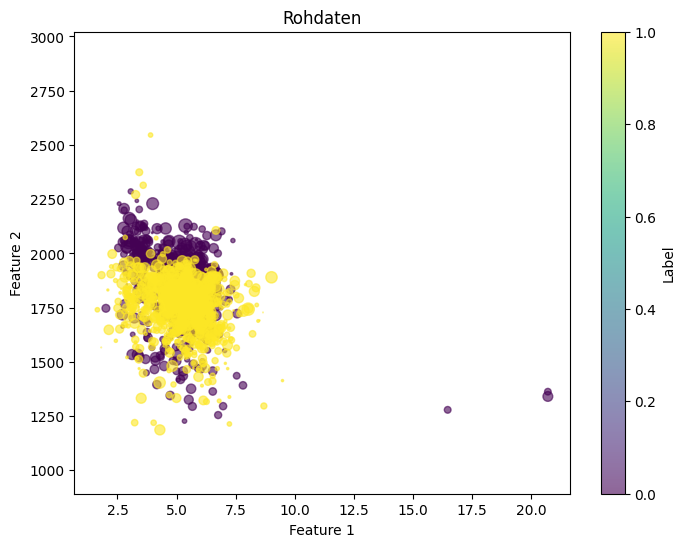

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(df['WindSpeed'], df['Cov1_1'], df["Cov1_2"], c=df["label"], alpha= 0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Rohdaten')
plt.colorbar(label='Label')
plt.show()

In [136]:
df = df.fillna(df.mean())


In [137]:
df.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'novelty_index', 'label'],
      dtype='object')

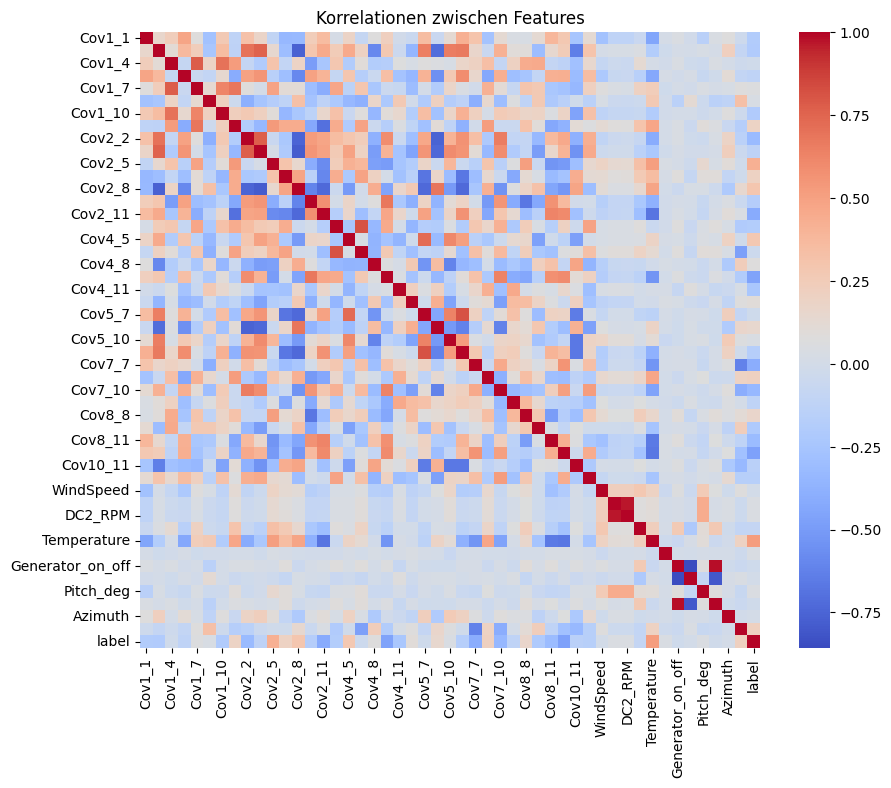

label            1.000000
Temperature      0.516341
Cov2_5           0.425444
Cov2_8           0.293431
Cov4_5           0.280112
Cov7_8           0.214068
novelty_index    0.210361
Cov2_7           0.198308
Cov1_11          0.191501
Cov8_8           0.160198
Name: label, dtype: float64


In [138]:


# Korrelation der Kovarianzen mit dem Label berechnen
correlation = df.corr()["label"].sort_values(ascending=False)

# Heatmap zur Visualisierung der Kovarianzwerte
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Korrelationen zwischen Features")
plt.show()

# Relevante Korrelationen ausgeben
print(correlation.head(10))  # Zeigt die Top 10 Merkmale, die mit Schäden (Label=1) zusammenhängen


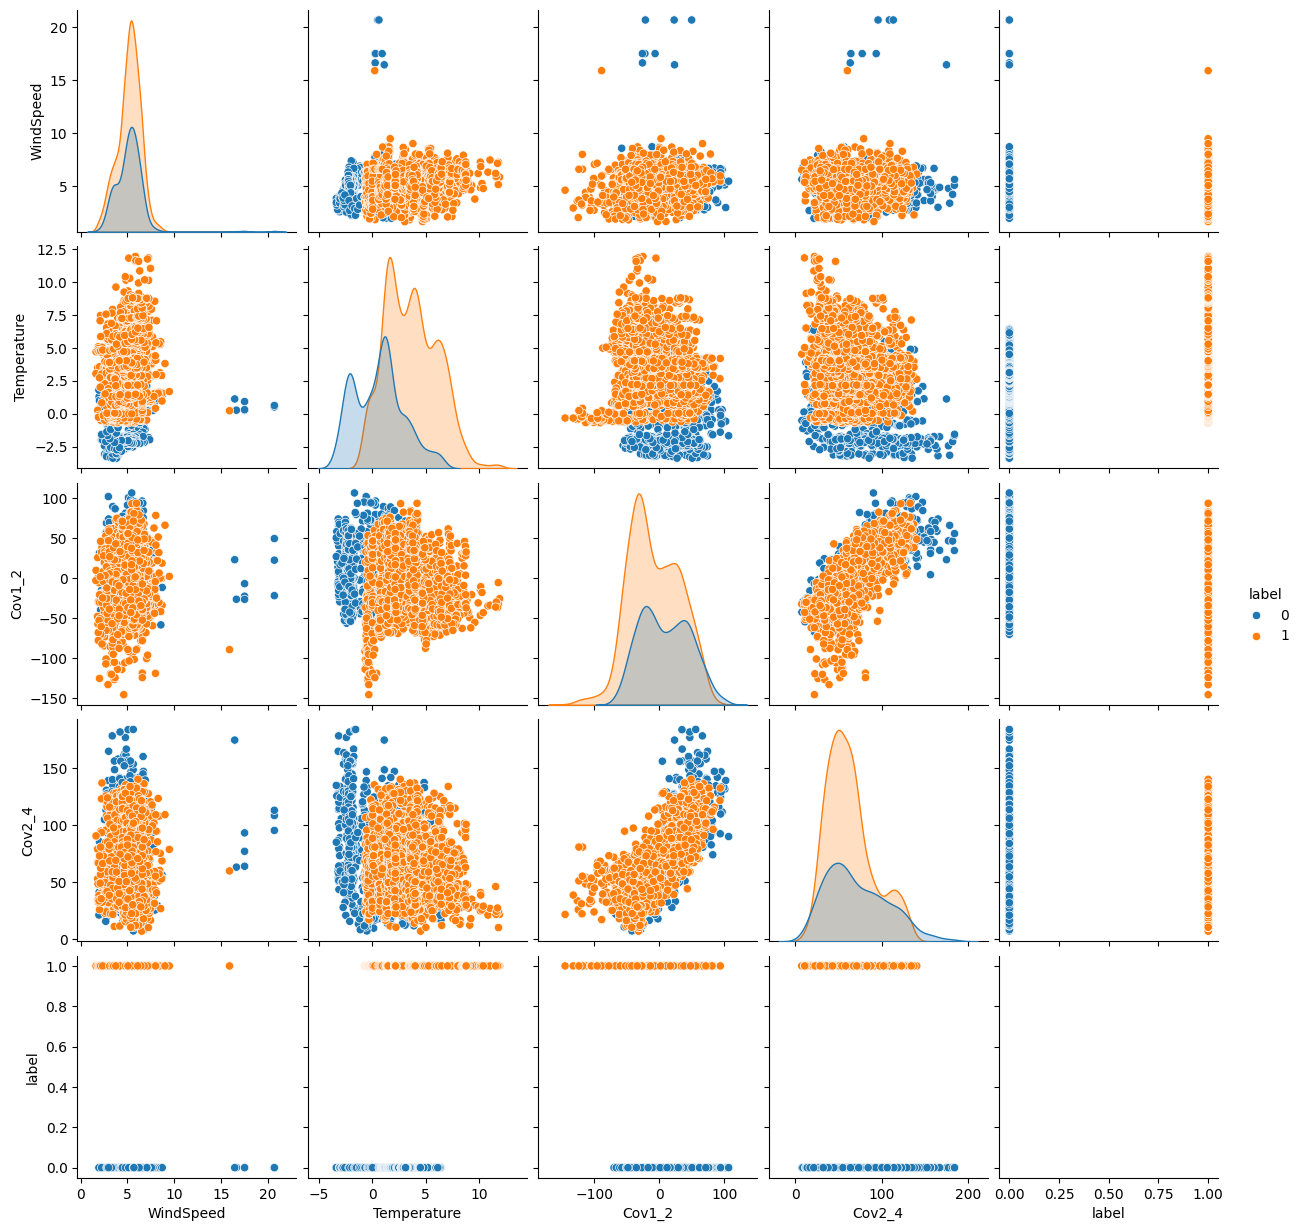

In [139]:
sns.pairplot(df, vars=["WindSpeed", "Temperature", "Cov1_2", "Cov2_4", "label"], hue="label")
plt.show()


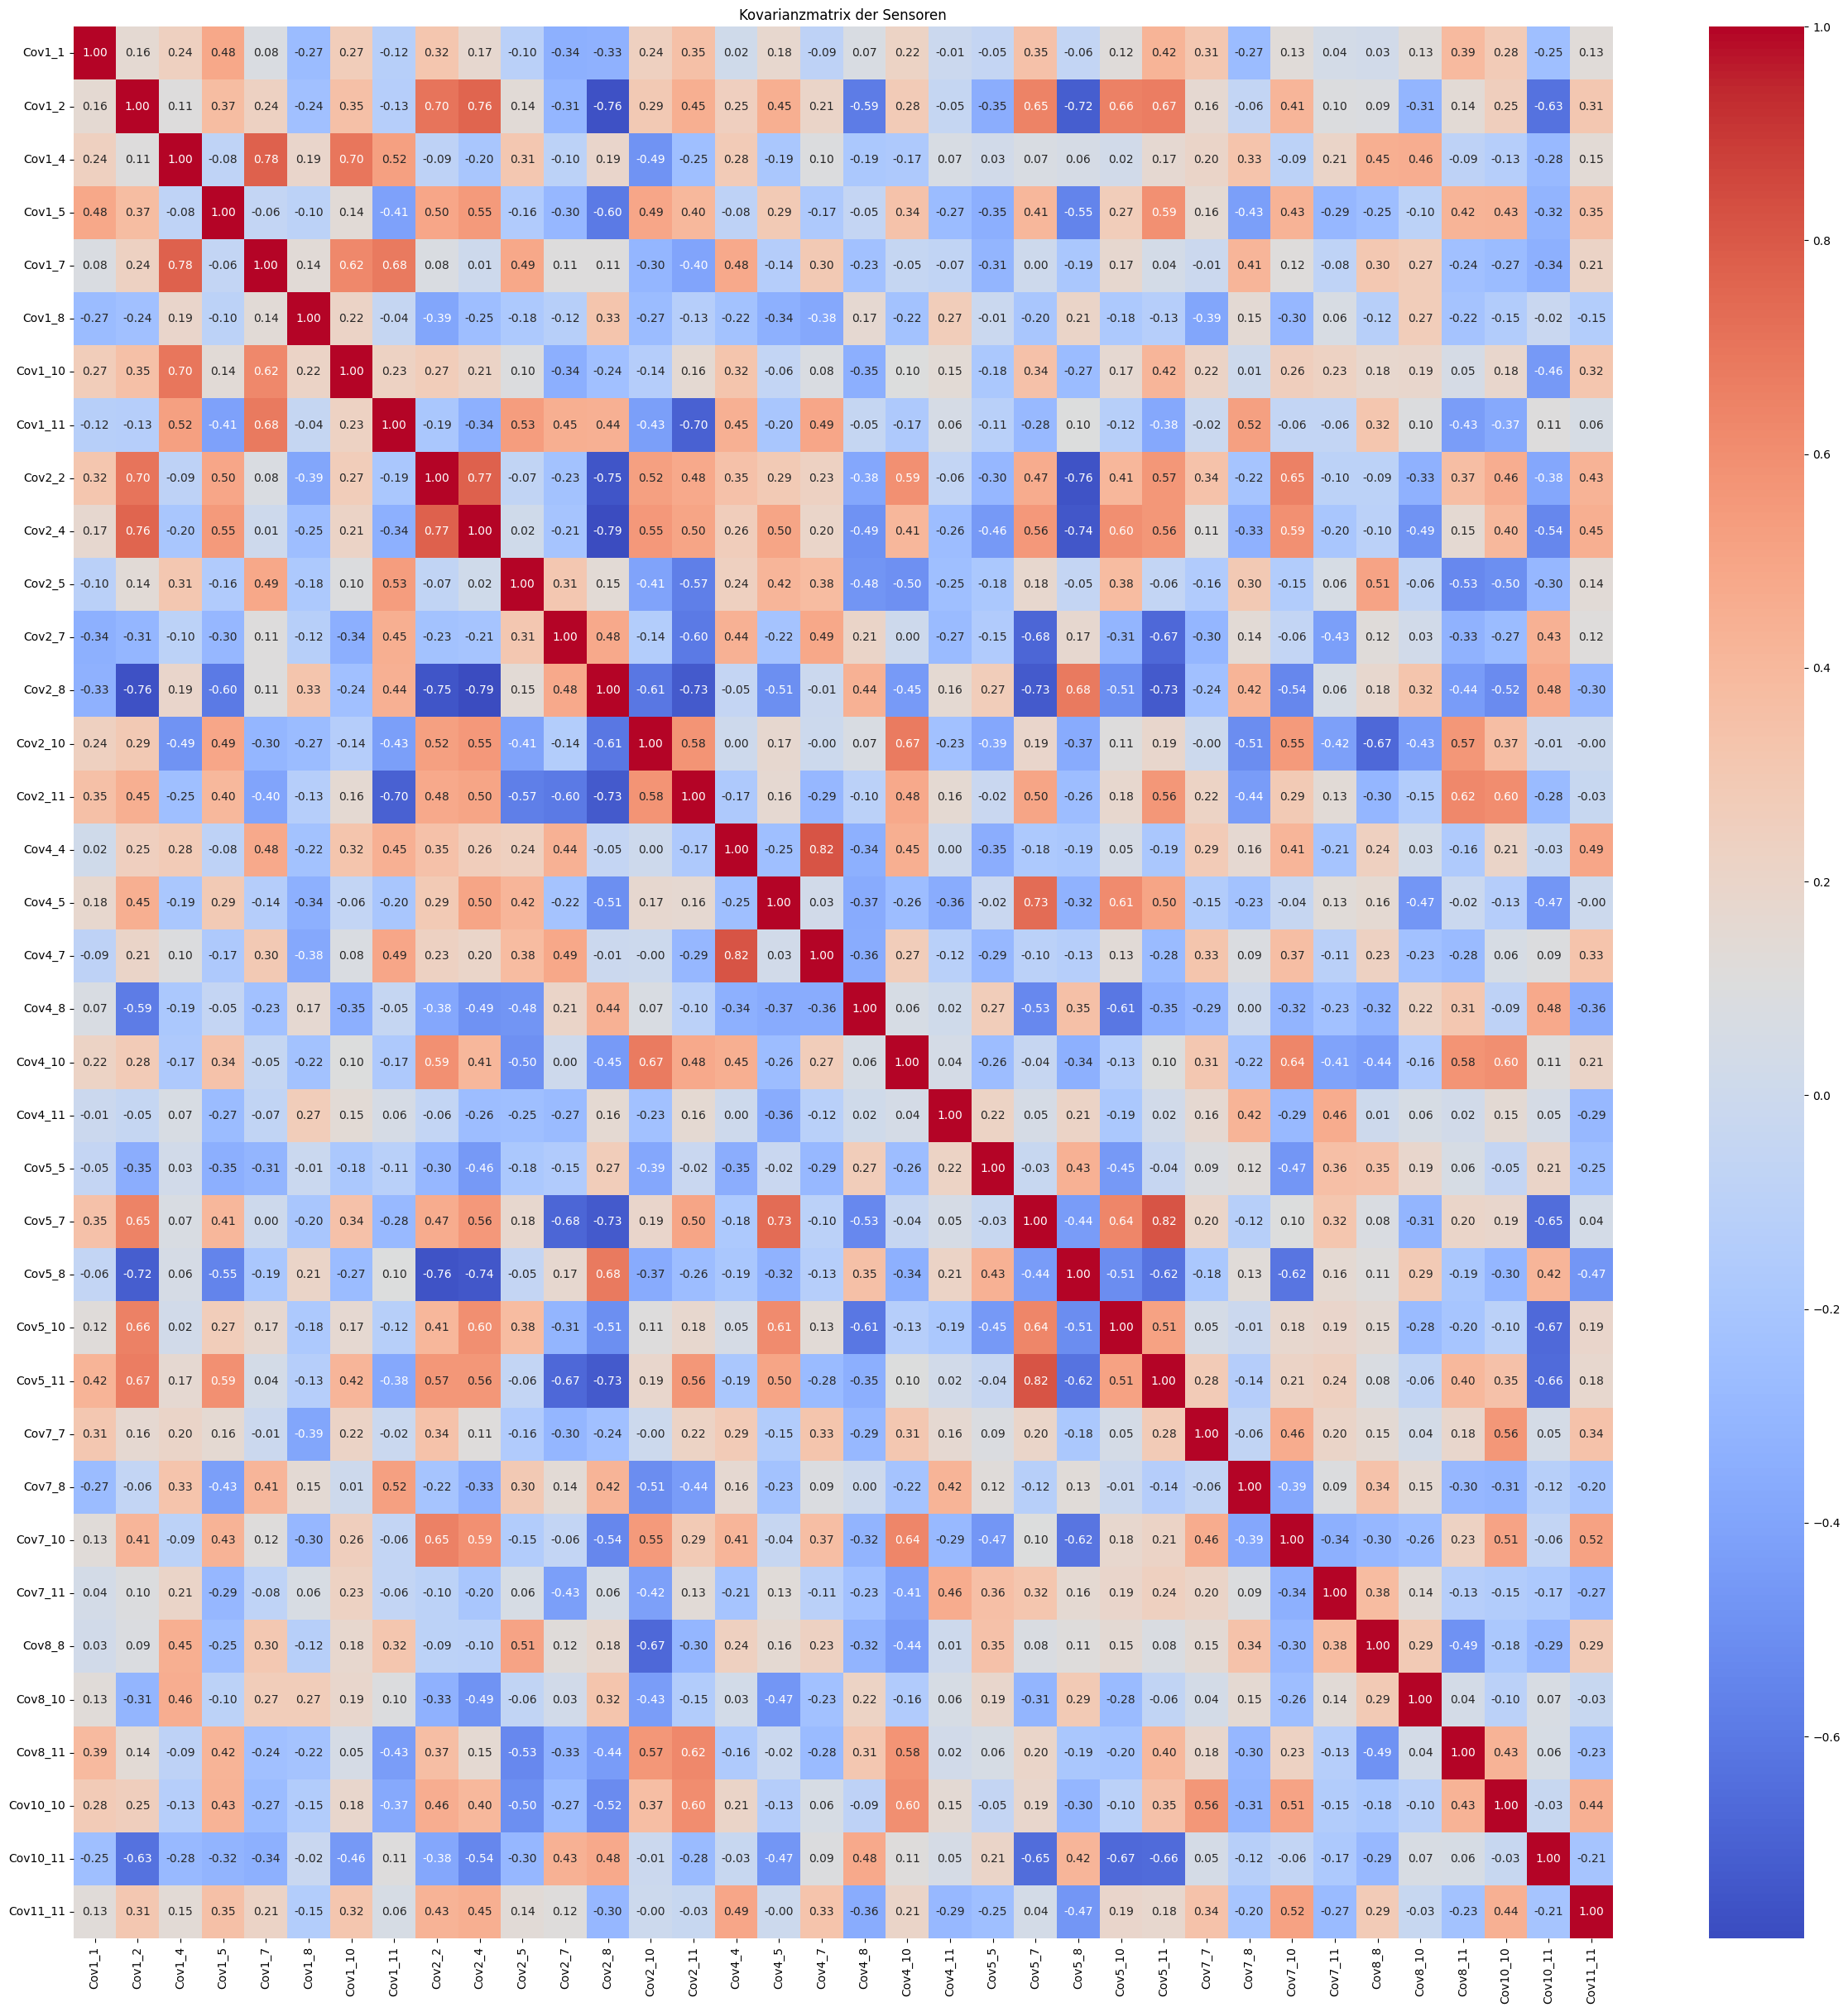

In [140]:


# Nur die Kovarianz-Spalten auswählen
cov_columns = [col for col in df.columns if "Cov" in col]
cov_matrix = df[cov_columns].corr()

# Heatmap zeichnen
plt.figure(figsize=(30,30))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Kovarianzmatrix der Sensoren")
plt.show()


In [141]:
from sklearn.preprocessing import StandardScaler

# Unnötige Spalten entfernen (Label nicht normalisieren)
features = df.drop(columns=["label", "novelty_index"])

# Standardisierung der Merkmale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# DataFrame mit gleichen Spaltennamen erstellen
df_scaled = pd.DataFrame(X_scaled, columns=features.columns)
df_scaled["label"] = df["label"]  # Label wieder hinzufügen

print(df_scaled.head())  # Überprüfe die normalisierten Daten


     Cov1_1    Cov1_2    Cov1_4    Cov1_5    Cov1_7    Cov1_8   Cov1_10  \
0 -0.717358  0.450638 -0.546826 -0.038076 -1.093025 -0.531832 -0.246411   
1  0.570193  0.326776 -0.198176  1.380743 -0.787369  0.596639  0.351869   
2  0.286492  0.157032  0.835460 -0.285135  1.301717 -0.193051  1.161660   
3 -0.303606 -1.000097  1.207171 -0.263699  0.531931  1.672995  1.287116   
4 -0.589937 -0.944818 -0.351051 -0.145600 -0.963442  0.505153  0.187100   

    Cov1_11    Cov2_2    Cov2_4  ...   DC2_RPM  Wind_Direction  Temperature  \
0 -0.501913  0.617657  0.370724  ...  0.025490        1.010220    -0.563239   
1 -1.308239  0.010364  0.235043  ...  0.049162        1.122388    -0.582414   
2  1.554666  0.972124 -0.105311  ... -0.106638        1.070319    -0.586609   
3 -0.354601 -1.141057 -1.166664  ... -0.401507        1.185310    -0.601176   
4 -1.174939 -0.535700 -0.325942  ... -1.368416        1.076832    -0.620440   

   Preciptation  Generator_on_off  Power_kW  Pitch_deg       Yaw   Azimuth

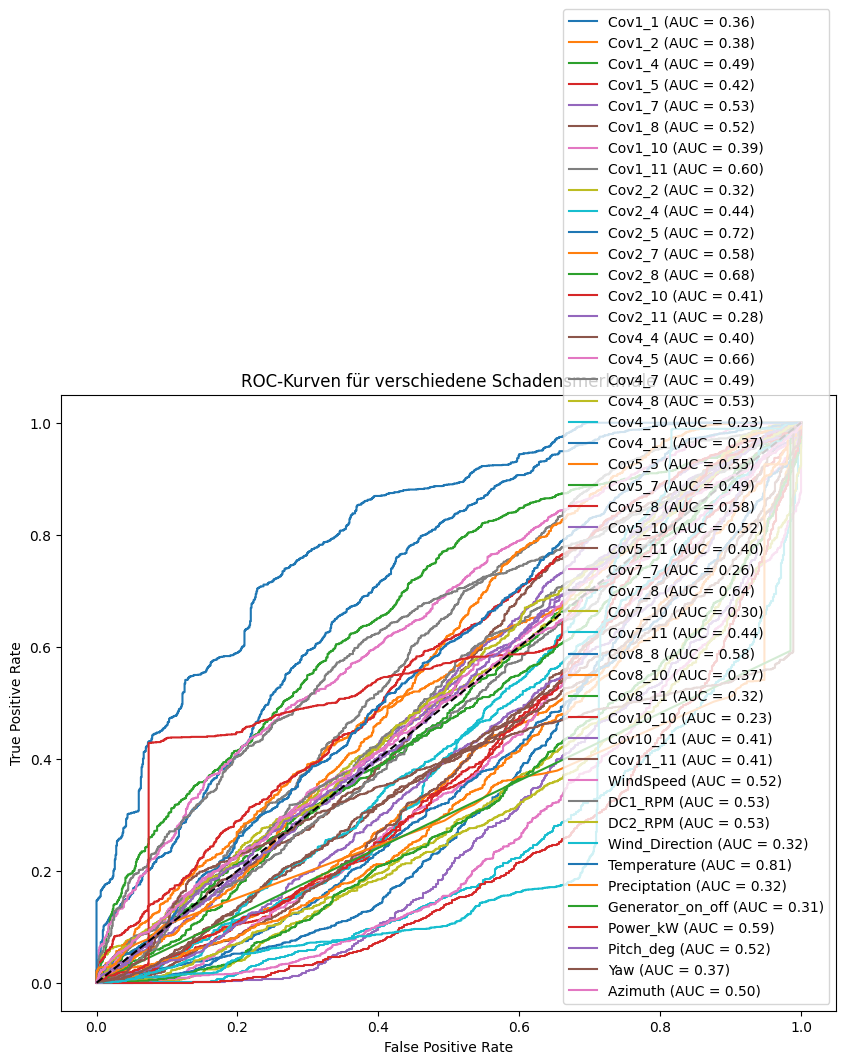

Bestes Schadensmerkmal: Temperature mit AUC = 0.81


In [142]:


# Unnötige Spalten entfernen (Label behalten)
X = df.drop(columns=["label", "novelty_index"])  # Features
y = df["label"]  # Zielvariable (0 = gesund, 1 = Schaden)

# Standardisierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["label"] = y  # Label wieder hinzufügen

plt.figure(figsize=(10, 8))

best_auc = 0
best_feature = None

# ROC-Kurve für jedes Feature berechnen
for feature in df_scaled.drop(columns=["label"]).columns:
    fpr, tpr, _ = roc_curve(y, df_scaled[feature])
    roc_auc = auc(fpr, tpr)

    # Beste AUC speichern
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_feature = feature

    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})')

# Formatierung der Grafik
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale als Referenz
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Kurven für verschiedene Schadensmerkmale')
plt.legend(loc='lower right')
plt.show()

print(f"Bestes Schadensmerkmal: {best_feature} mit AUC = {best_auc:.2f}")


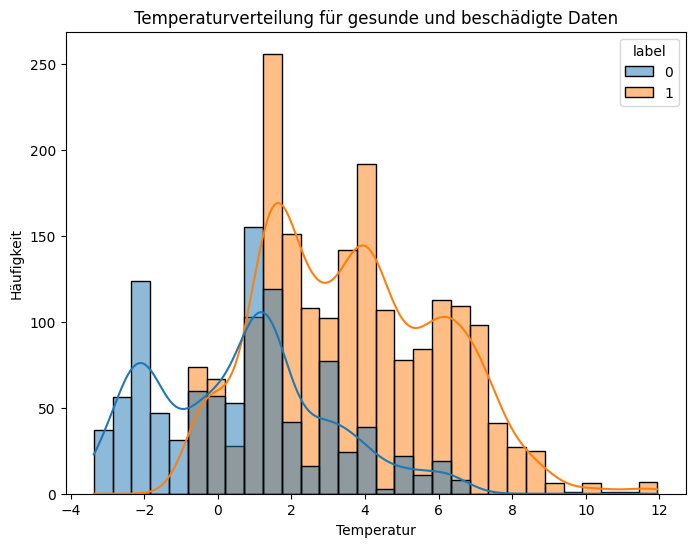

In [143]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df, x="Temperature", hue="label", bins=30, kde=True)
plt.xlabel("Temperatur")
plt.ylabel("Häufigkeit")
plt.title("Temperaturverteilung für gesunde und beschädigte Daten")
plt.show()


In [144]:
correlation_matrix = df[["Temperature", "WindSpeed", "Power_kW", "label"]].corr()
print(correlation_matrix)


             Temperature  WindSpeed  Power_kW     label
Temperature     1.000000   0.201710  0.014401  0.516341
WindSpeed       0.201710   1.000000 -0.048788 -0.002668
Power_kW        0.014401  -0.048788  1.000000 -0.005584
label           0.516341  -0.002668 -0.005584  1.000000
